You can install the following packages by changing directories to this folder then running `pip3 install -r requirements.txt`

If you have any issues with installation or imports, make sure you are using the correct python kernel. Worst case, install Anaconda w/ Python.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from exec import *
from config import *

# <b> Pandas and Dataframes </b>

query data from our database


In [ ]:
def get_all_users():
    users_query =   """
                    SELECT username FROM users;
                    """

    users_set = execute_query(users_query)

    username_list = []

    for user in users_set:
        username_list.append(user['username'])
    return(username_list)


users = get_all_users()

df_users = pd.DataFrame(users, columns=["usernames"])

print(df_users)

query data from a csv

In [ ]:
# link to get this data on GH
# https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv

df_students = pd.read_csv("StudentsPerformance.csv")

print(df_students)

In [ ]:
df_hanes = pd.read_csv("nhanes.csv")

print(df_hanes)

# <b> Dataframe Deepdive </b>

In [ ]:
num_rows = int(input("How many rows do you want to see?"))

df_users.head(num_rows)

In [ ]:
#TIP: Use `.loc(rows)` to display the row you want to see from the dataset.

row = int(input("Which row do you want to see?"))

df_users.loc[row]

In [ ]:
df_students.lunch.value_counts()

In [ ]:
# Respondants' education levels
print(df_hanes.Education.value_counts())

# Total number of respondents that said they had an education
print(f"Respondents that answered if they have an education: {df_hanes.Education.value_counts().sum()}")
# TIP: You can stack various function on your query in a DF.



In [ ]:
# Total number of respondents that answered at all, given that every respondent has an ID
print(f"Respondents that answered: {df_hanes.ID.count()}")

In [ ]:
df_students.groupby("gender")["math score"].value_counts()
#TIP: ...
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# Pandas groupby is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently.

# Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. 
# The abstract definition of grouping is to provide a mapping of labels to group names.

In [ ]:
dx = df_hanes.loc[~df_hanes.Education.isin(["Some value you want to remove."]), :]  # Eliminate specific values
print(dx)

dx = dx.groupby(["AgeDecade", "Gender"])["Education"]
dx = dx.value_counts()
print(dx)


In [ ]:

dx = dx.unstack() # Restructure the results from 'long' to 'wide'
print(dx)


In [ ]:

dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx)

In [ ]:
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

# <b> Creating new columns in the data frame for derivative values </b>

In [ ]:
#TODO: 

# likes_per_tweet / len_of_tweet:
#   get all tweets
#       put the length of a tweet in a new table sorted by tweetID
#   get all likes
#       aggregate likes per tweet and put in new variable by tweetID
#       df_fitter.tweetID.value_counts()
#   make a new table of columns: tweetID, tweet likes, length of tweets
#       df_fitter.groupby("likes")["length"].value_counts()
#       analyze correlation

In [56]:
def get_all_likes():
    likes_query =   """
                    SELECT * FROM likes;
                    """

    likes_set = execute_query(likes_query)

    like_list = []

    for like in likes_set:
        like_list.append(like[1])
    return(like_list)


likes = get_all_likes()

df_likes = pd.DataFrame(likes, columns=["tweetID"])

print(df_likes)

print(df_likes.value_counts())

running command:  
                    SELECT * FROM likes;
                    
     tweetID
0          1
1          1
2          1
3          1
4          1
..       ...
134       15
135       15
136       15
137        1
138        1

[139 rows x 1 columns]
tweetID
1          16
10         13
2          11
6          11
4          10
5          10
3           9
8           9
9           9
13          9
12          8
15          8
14          7
11          6
7           3
dtype: int64


In [55]:
def get_all_tweets():
    tweets_query =   """
                    SELECT * FROM tweets;
                    """

    tweets_set = execute_query(tweets_query)

    # print(tweets_set)

    tweet_list = []

    for tweet in tweets_set:
        # print(tweet)
        tweet_list.append([tweet[0],len(tweet[2])])
    return(tweet_list)


tweets = get_all_tweets()

df_tweets = pd.DataFrame(tweets, columns=["tweetID", "length"])

print(df_tweets)


running command:  
                    SELECT * FROM tweets;
                    
     tweetID  length
0          1     168
1          2     122
2          3     122
3          4     168
4          5     122
..       ...     ...
110      111     168
111      112     122
112      113      56
113      114      56
114      115     122

[115 rows x 2 columns]


In [54]:
df_likes_aggregate = df_likes.value_counts().rename_axis('tweetID').reset_index(name='counts')
print (df_likes_aggregate)

    tweetID  counts
0         1      16
1        10      13
2         2      11
3         6      11
4         4      10
5         5      10
6         3       9
7         8       9
8         9       9
9        13       9
10       12       8
11       15       8
12       14       7
13       11       6
14        7       3


In [53]:
#inner join
merged_inner = pd.merge(left=df_likes_aggregate, right=df_tweets, left_on='tweetID', right_on='tweetID')

merged_inner

,tweetID,counts,length
0,1,16,168
1,10,13,122
2,2,11,122
3,6,11,168
4,4,10,168
5,5,10,122
6,3,9,122
7,8,9,122
8,9,9,122
9,13,9,122


In [52]:
df = merged_inner.groupby("length")["counts"].value_counts()

print(df)

length  counts
56      3         1
        6         1
122     9         4
        8         2
        7         1
        10        1
        11        1
        13        1
168     10        1
        11        1
        16        1
Name: counts, dtype: int64


# <b> Visualization Introduction </b>
- #### demonstrate most common graph types
- #### finish with scatterplot between tweet length and like count


In [ ]:
g = sns.barplot(x="lunch", y="math score", data=df_students)

In [ ]:
g = sns.FacetGrid(df_students, row = "lunch")
g = g.map(plt.hist, "math score")
plt.show()

In [ ]:
# Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x = df_hanes["Age"], y = df_hanes["HHIncome"])

In [ ]:
# Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x = df_hanes["Age"], y = df_hanes["HealthGen"])

In [ ]:
sns.scatterplot(data = df_hanes, x = "Age", y = "HealthGen")

plt.show()

In [ ]:
sns.scatterplot(data = df_hanes, x = "Age", y = "HHIncome")

plt.show()

In [ ]:
grid = sns.FacetGrid(df_hanes, col = "HealthGen", hue = "HealthGen", col_wrap=1)
grid.map(sns.scatterplot, "HHIncome", "Age")

grid.add_legend()

plt.show()


### fitter correlation

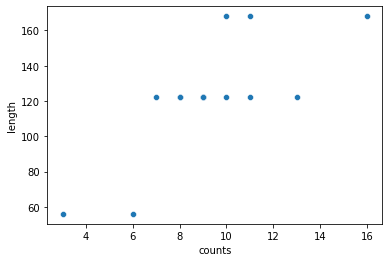

In [50]:
sns.scatterplot(data = merged_inner, x = "counts", y = "length")

plt.show()

#scatterplot between counts and length 

In [51]:
print(merged_inner['counts'].corr(merged_inner['length']))

#correlation on the mergred_inner df between counts (likes on a tweet) and tweet length

0.7672975255108387


In [ ]:
#TODO: 